Dataset shape: (10000, 14)

Missing values:
 Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


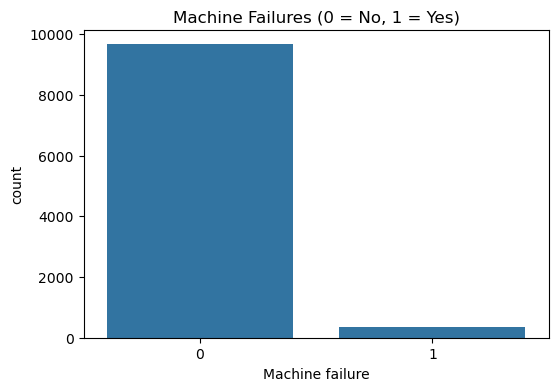

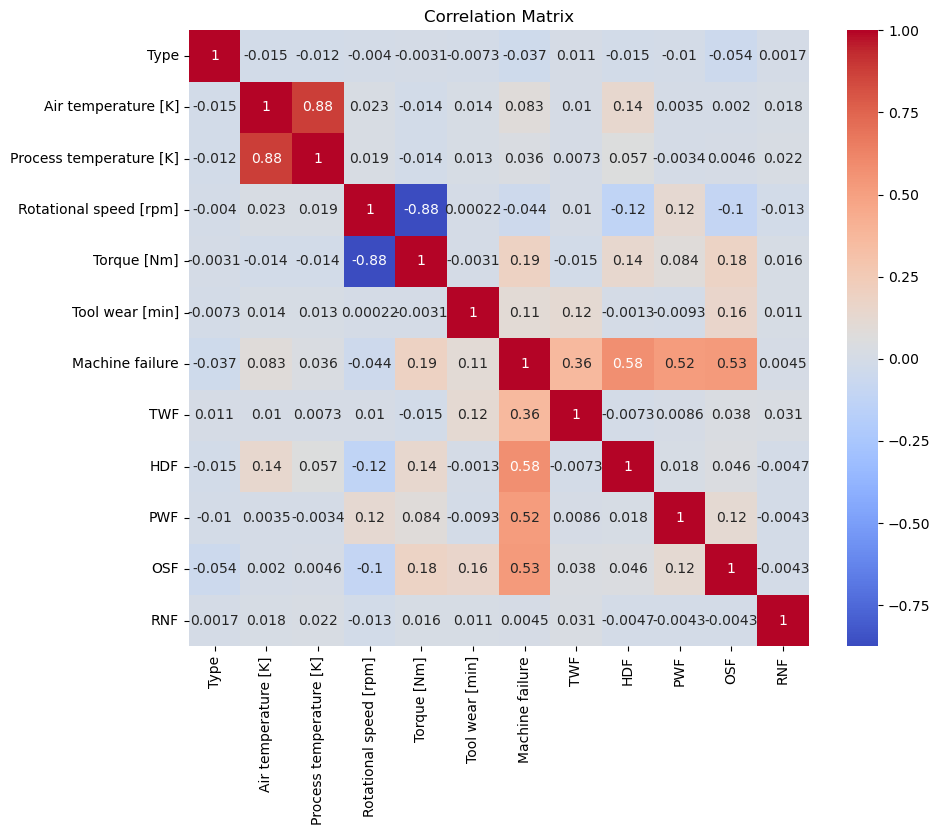

✅ Accuracy Score: 0.999

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000


✅ Confusion Matrix:
 [[1939    0]
 [   2   59]]


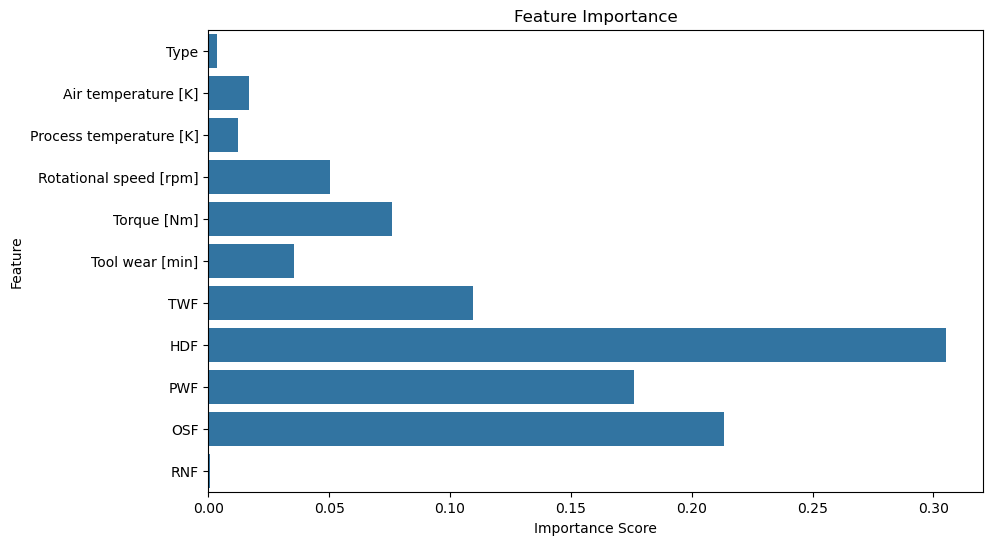

In [5]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load Dataset
df = pd.read_csv("ai4i2020.csv")
print("Dataset shape:", df.shape)
df.head()

# 3. Data Cleaning & Preprocessing
# Drop ID columns
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# Encode 'Type' column: L=0, M=1, H=2
df['Type'] = df['Type'].map({'L': 0, 'M': 1, 'H': 2})

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 4. EDA – Failure Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Machine failure', data=df)
plt.title("Machine Failures (0 = No, 1 = Yes)")
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 6. Feature & Target Split
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Evaluate Model
y_pred = model.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 10. Feature Importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
